<a href="https://colab.research.google.com/github/IbrahimBajwa313/Data-Science/blob/master/%20Data%20Preprocessing%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [25]:
import pandas as pd
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:


# Structure
print(raw.info())

# Summary statistics
print(raw.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [12]:
import matplotlib.pyplot as plt

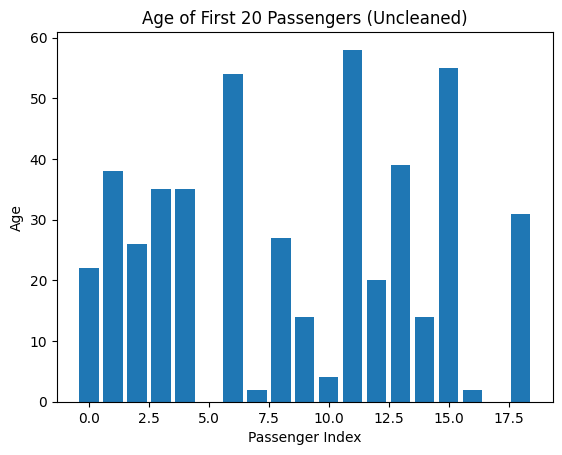

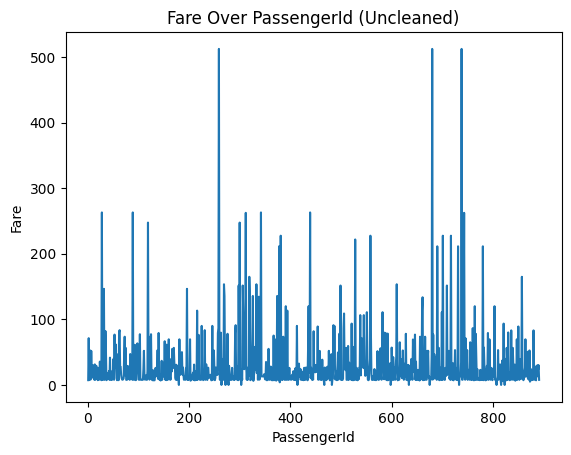

In [19]:

# --- Task 2 (Uncleaned Visualization) ---
# Bar chart (Duration, first 20 records)

# Bar chart (Age for first 20 records)
plt.bar(raw.index[:20], raw["Age"][:20])
plt.xlabel("Passenger Index")
plt.ylabel("Age")
plt.title("Age of First 20 Passengers (Uncleaned)")
plt.show()

# Line chart (Fare over PassengerId)
plt.plot(raw["PassengerId"], raw["Fare"])
plt.xlabel("PassengerId")
plt.ylabel("Fare")
plt.title("Fare Over PassengerId (Uncleaned)")
plt.show()


In [27]:
# 1. Handle missing values
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Embarked"].fillna(method="ffill", inplace=True)

# 2. Fix invalid data (extreme Fares)
median_fare = df["Fare"].median()
df.loc[df["Fare"] > 300, "Fare"] = median_fare

# 3. Remove duplicates
df.drop_duplicates(inplace=True)

# Show cleaned dataset
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


/tmp/ipython-input-1175998307.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)
/tmp/ipython-input-1175998307.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

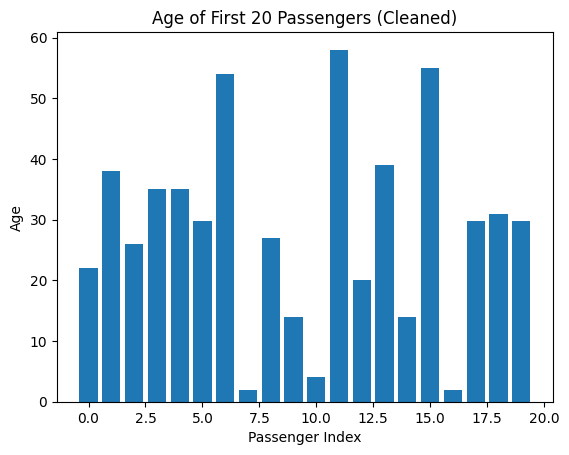

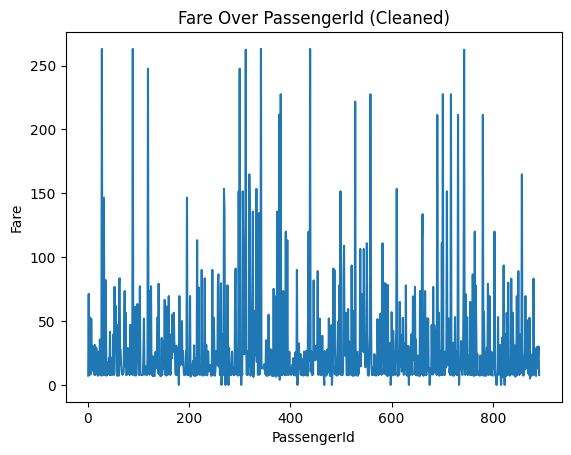

In [28]:
# Bar chart (Age for first 20 after cleaning)
plt.bar(df.index[:20], df["Age"][:20])
plt.xlabel("Passenger Index")
plt.ylabel("Age")
plt.title("Age of First 20 Passengers (Cleaned)")
plt.show()

# Line chart (Fare over PassengerId after cleaning)
plt.plot(df["PassengerId"], df["Fare"])
plt.xlabel("PassengerId")
plt.ylabel("Fare")
plt.title("Fare Over PassengerId (Cleaned)")
plt.show()


In [29]:
df = df.drop(["Name", "Ticket", "Cabin"], axis=1)
print(df.head())


   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


In [30]:
from sklearn.preprocessing import LabelEncoder

# Encode Sex
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])

# Fill missing Age with mean
# df["Age"].fillna(df["Age"].mean(), inplace=True)

# Fill missing Embarked with mode
# df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


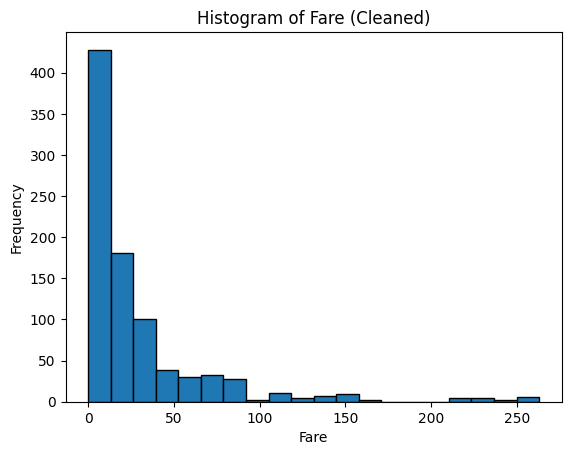

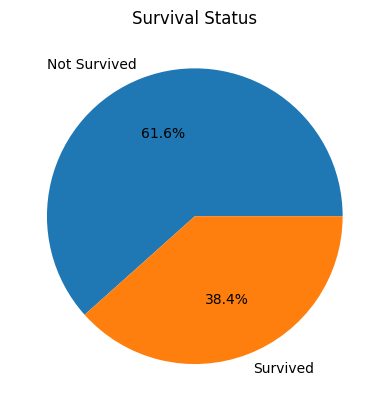

In [31]:
# Histogram of Fare
plt.hist(df["Fare"], bins=20, edgecolor="black")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Histogram of Fare (Cleaned)")
plt.show()

# Pie chart of survival
survival_counts = df["Survived"].value_counts()
plt.pie(survival_counts, labels=["Not Survived", "Survived"], autopct="%1.1f%%")
plt.title("Survival Status")
plt.show()


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X = features except Survived
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Scale numerical features
scaler = StandardScaler()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (712, 8)
Test shape: (179, 8)
